<a href="https://colab.research.google.com/github/pedromirsky/Calculo-Numerico/blob/main/Metodos_Num_Integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# librerías
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import math
from sympy import sin,exp
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from scipy.interpolate import lagrange

In [ ]:
x = sy.Symbol('x')
f1 = x**2
f2 = 1/(x+1) 
f3 = exp(x)
f4 = (x**3) /(1+x**0.5) 

## Valor Real:

$\int _0^2x^2dx$

In [ ]:
x = sy.Symbol('x')
f1 = x**2
area_real = sy.integrate(f1, (x, 0, 2))
print(area_real)
print("...........")      
f1_real = area_real.evalf()
f1_real

8/3
...........


2.66666666666667

$\int _0^2\:\frac{1}{\left(x+1\right)}dx$

In [ ]:
x = sy.Symbol('x')
f2 = 1/(x+1) 
area_real = sy.integrate(f2, (x, 0, 2))
print(area_real)
print("...........")      
f2_real =area_real.evalf()
f2_real

log(3)
...........


1.09861228866811

$\int _0^1\:e^xdx$

In [ ]:
x = sy.Symbol('x')
f3 = exp(x)
area_real = sy.integrate(f3, (x, 0, 1))
print(area_real)
print("...........")      
f3_real = area_real.evalf()
f3_real

-1 + E
...........


1.71828182845905

$\int _1^2\:\frac{x^3}{\left(1+x^{0.5}\right)}dx$

In [ ]:
#x = sy.Symbol('x')
#f4 = (x**3) /(1+x**0.5) 
#area_real = sy.integrate(f4, (x, 1, 2))
#print(area_real)
#print("...........")      
#area_real.evalf()
# no lo puede resolver 
# según symbolab:
f4_real = 1.64710

In [ ]:
f4_real = 1.64710

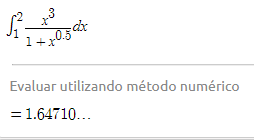

#Punto Medio:

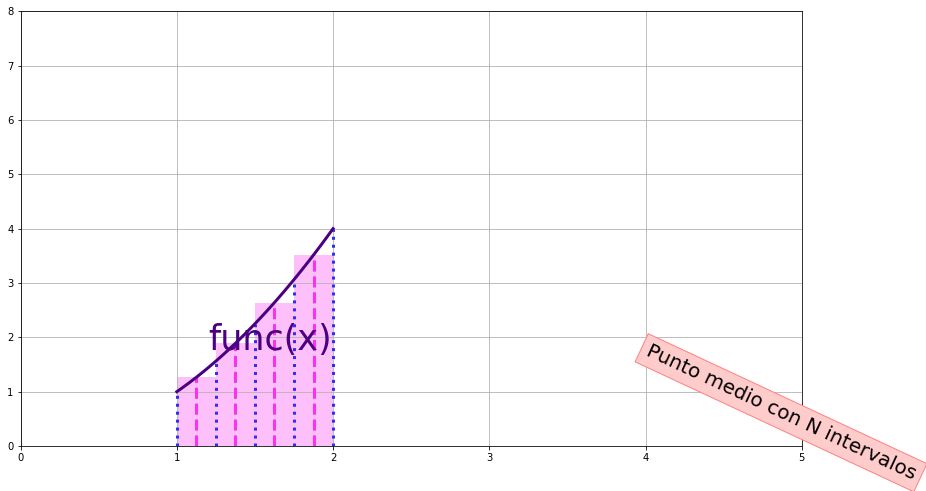

In [ ]:
x = sy.Symbol('x')
# PRUEBO CON CADA UNA DE LAS FUNCIONES DESCOMENTANDOLAS DE A UNA:

def func(x): return x**2    #f1
#def func(x): return 1/(x+1)  #f2
#def func(x): return exp(x)  #f3
#def func(x): return (x**3) /(1+x**0.5)  #f4


x = np.linspace(1,2,50)
y = func(x)

seccion_interes = [1,2] # donde esta definida la integral
N = 5 # => voy a obtener N=5 => 4 intervalos
v_intevalos_x = np.linspace(seccion_interes[0],seccion_interes[1],N) # vector/array #N intervalos
func(v_intevalos_x)

def calcular_punto_medio(v):
  resultado = []
  for i in range(1,len(v)):
    #print((v[i]-v[i-1])/2)
    resultado.append(v[i-1]+(v[i]-v[i-1])/2)
    

  return np.asarray(resultado)


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

ax.text(5.75, 1.92, "Punto medio con N intervalos", size=20, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
## ==================================================


# Anteriormente lo vimos en derivadas
ax.vlines(x = v_intevalos_x, ymin = np.zeros(N), ymax = func(v_intevalos_x),
          linewidth=3,linestyle=':',color='#2b30f1')


ax.text(1.2, 1.76, r'func(x)', fontsize=35,color='#4b0082')
#plt.fill_between(x,func(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='green', alpha=0.3)

## Punto medio ---------------
v_punto_medio = calcular_punto_medio(v_intevalos_x)
ax.vlines(x = v_punto_medio, ymin = np.zeros(len(v_punto_medio)), ymax = func(v_punto_medio),
          linewidth=3,linestyle='--',color='#fb30f1')


# meto en un ciclo for para que se vayan desplazando los rectangulos
for i in range(0,len(v_intevalos_x)-1):
  inicio_ = v_intevalos_x[i]
  fin_    = v_intevalos_x[i+1] -inicio_

  ax.add_patch(
     patches.Rectangle(
        (inicio_, 0),
        fin_,func(v_punto_medio[i]),
        #edgecolor = '#fb30f1',
        facecolor = '#fb30f1',
        alpha=0.3,
        fill=True
     ) )

ax.axis([0, 5, 0 , 8])
ax.grid(True)

plt.show()

In [ ]:

def puntoMedio(x0,xn,f,N):
  #necesito primero un vector que vaya de a hasta b con N números en el medio dados por la N
  # si hay 4 intervalos, entonces hay 5 números en total x0, x1,x2,x3, xn N = 5
  v = np.linspace(x0,xn,N)
  areaTot = 0

  for i in range(0,len(v)-1):
  
    areaRec = f.subs(x,((v[i] + v[i+1])) / 2)*(v[i+1]-v[i])
    areaTot = areaTot + areaRec
  
  return areaTot

f1 Punto Medio N intervalos con N = 5 (4 intervalos)

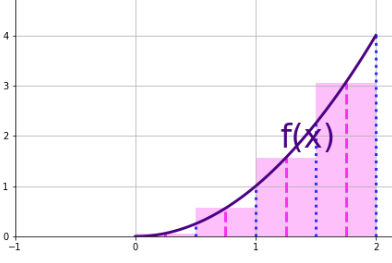

In [ ]:
f1_puntoMedio = puntoMedio(0,2,f1,5)
print(f1_puntoMedio)
print("error: ", abs(f1_puntoMedio - f1_real))

2.0*x**2
error:  Abs(2.0*x**2 - 2.66666666666667)


f2 Punto Medio N intervalos con N= 5 (4 intervalos)

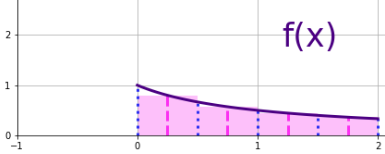

In [ ]:
f2_puntoMedio = puntoMedio(0,2,f2,5)
print(f2_puntoMedio)
print("error: ", abs(f2_puntoMedio - f2_real))

2.0/(x + 1)
error:  Abs(1.09861228866811 - 2.0/(x + 1))


f3 me tira un error para el gráfico



In [ ]:
f3_puntoMedio = puntoMedio(0,1,f3,5)
print(f3_puntoMedio)
print("error: ", abs(f3_puntoMedio - f3_real))


1.0*exp(x)
error:  Abs(1.0*exp(x) - 1.71828182845905)


f4 Punto Medio N intervalos con N= 5 (4 intervalos)

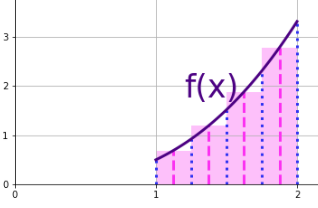

In [ ]:
f4_puntoMedio = puntoMedio(1,2,f4,5)
print(f4_puntoMedio)
print("error: ", abs(f4_puntoMedio - f4_real))


1.0*x**3/(x**0.5 + 1)
error:  Abs(1.0*x**3/(x**0.5 + 1) - 1.6471)


# Trapezoidal


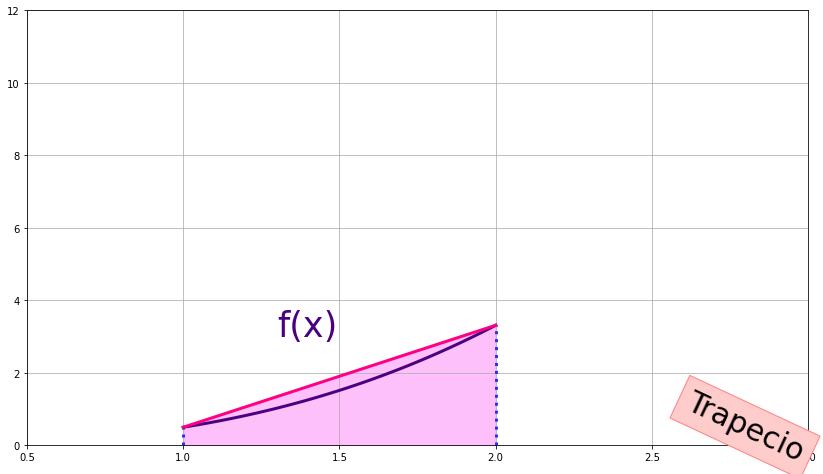

In [ ]:
#def func(x): return x**2    #f1 0 a 2
#def func(x): return 1/(x+1)  #f2 0 a 2
#def func(x): return exp(x)  #f3 0 a 1 # ACA ME TIRA UN ERROR ?)
def func(x): return (x**3) /(1+x**0.5)  #f4 1 a 2

#limites:
a = 1
b = 2

trapecio_x= seccion_interes
trapecio_y=[func(seccion_interes[0]),func(seccion_interes[1])]
p_trapecio = lagrange(trapecio_x,trapecio_y)


def recta_trapecio(x): 
  return (p_trapecio[1]*x+p_trapecio[0])

y = func(x)
x = np.linspace(a,b,50)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

seccion_interes = [a,b]
ax.vlines(x=seccion_interes[0], ymin=0, ymax=func(seccion_interes[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=seccion_interes[1], ymin=0, ymax=func(seccion_interes[1]) ,linewidth=3,linestyle=':',color='#2b30f1')



ax.text(1.3, 3, r'f(x)', fontsize=35,color='#4b0082')
#plt.fill_between(x,func(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='green', alpha=0.3)

## Trapecio ---------------


ax.plot(x,recta_trapecio(x),color='#ff0082', linewidth=3)

# completo el área bajo la recta
ax.fill_between(x,recta_trapecio(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='#fb30f1', alpha=0.3)



ax.text(3, 1.6, "Trapecio", size=30, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
## Fin Trapecio ---------------       

ax.axis([0.5, 3, 0 , 12])
ax.grid(True)

plt.show()

In [ ]:
x = sy.Symbol('x')
def trapezoidal(a,b,f):
  return (0.5 * (f.subs(x,b)+f.subs(x,a)) * (b-a))


   

# al no haber intervalos el error es muy grande

f1 : Trapezoidal

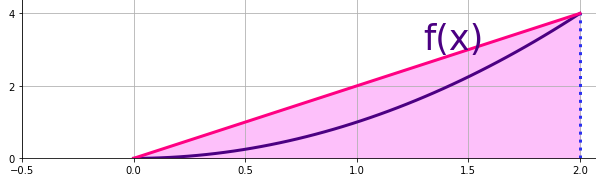

In [ ]:
x = sy.Symbol('x')
trapezoidal(0,2,f1).evalf()


4.00000000000000

In [ ]:
#error
abs(trapezoidal(0,2,f1)-f1_real)

1.33333333333333

f2: Trapezoidal

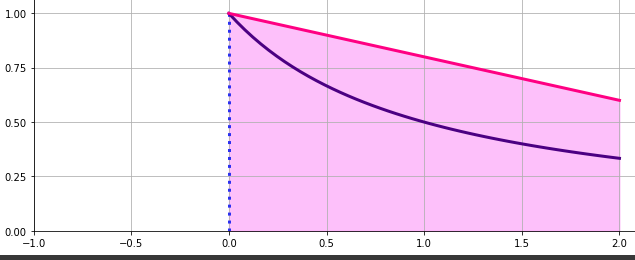

In [ ]:
x = sy.Symbol('x')
trapezoidal(0,2,f2).evalf()


1.33333333333333

In [ ]:
#error
abs(trapezoidal(0,2,f2)-f2_real)

0.234721044665223

f3: Trapezoidal --> gráfico tira error


In [ ]:
x = sy.Symbol('x')
trapezoidal(0,1,f3).evalf()

1.85914091422952

In [ ]:
#error
abs(trapezoidal(0,1,f3)-f3_real)

-1.21828182845905 + 0.5*E

f4: Trapezoidal

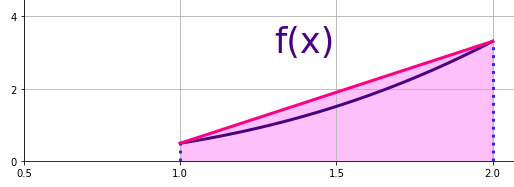

In [ ]:
x = sy.Symbol('x')
trapezoidal(1,2,f4).evalf()

1.90685424949238

In [ ]:
#error
abs(trapezoidal(1,2,f4)-f4_real)

0.259754249492380

# Simpson 1/3


In [ ]:
seccion_interes = [a,b]
punto_medio = (seccion_interes[1]-seccion_interes[0])/2
simpson_x= [seccion_interes[0],punto_medio,seccion_interes[1]]
simpson_y=[func(seccion_interes[0]),func(punto_medio),func(seccion_interes[1])]
p_2 = lagrange(simpson_x,simpson_y)

In [ ]:
def curva_simpson(x): 
  return (p_2[2]*x**2+p_2[1]*x+p_2[0])

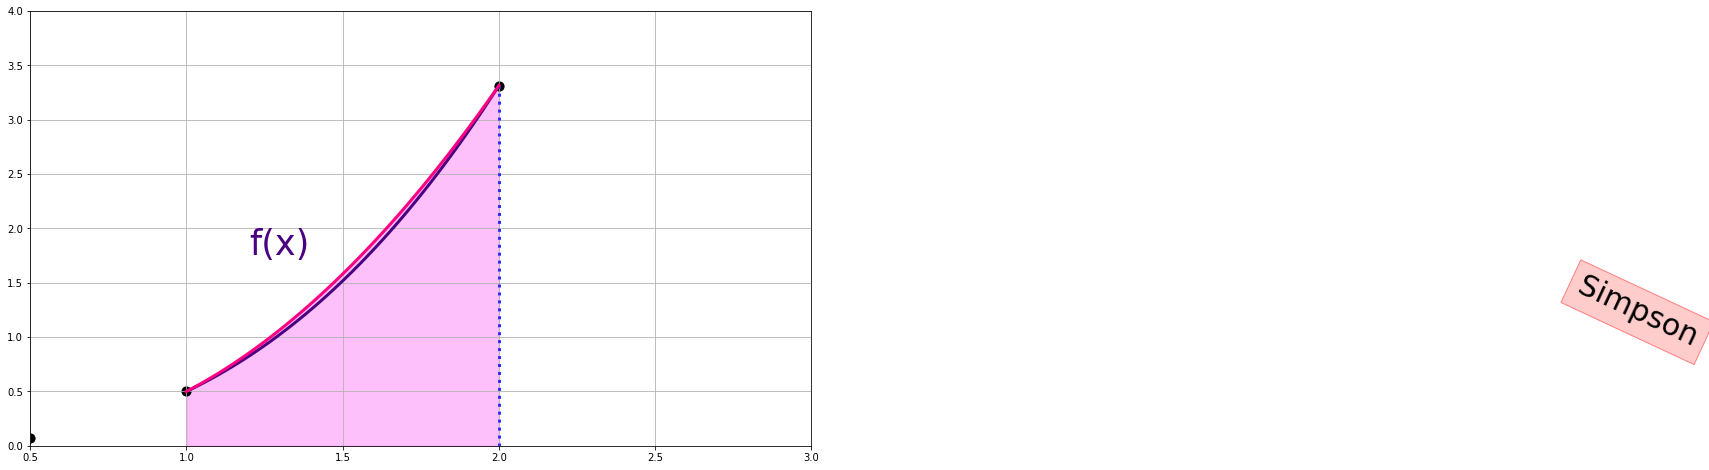

In [ ]:
#def func(x): return x**2    #f1 0 a 2
#def func(x): return 1/(x+1)  #f2 0 a 2
#def func(x): return exp(x)  #f3 0 a 1 # ACA ME TIRA UN ERROR ?)
def func(x): return (x**3) /(1+x**0.5)  #f4 1 a 2

#limites
a =1
b =2

seccion_interes = [a,b]
punto_medio = (seccion_interes[1]-seccion_interes[0])/2
simpson_x= [seccion_interes[0],punto_medio,seccion_interes[1]]
simpson_y=[func(seccion_interes[0]),func(punto_medio),func(seccion_interes[1])]
p_2 = lagrange(simpson_x,simpson_y)

def curva_simpson(x): 
  return (p_2[2]*x**2+p_2[1]*x+p_2[0])


x = np.linspace(a,b,50) 
y = func(x)
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

seccion_interes = [0,2]
ax.vlines(x=seccion_interes[0], ymin=0, ymax=func(seccion_interes[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=seccion_interes[1], ymin=0, ymax=func(seccion_interes[1]) ,linewidth=3,linestyle=':',color='#2b30f1')



ax.text(1.2, 1.76, r'f(x)', fontsize=35,color='#4b0082')
#plt.fill_between(x,f(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='green', alpha=0.3)

## Trapecio ---------------


ax.plot(x,curva_simpson(x),color='#ff0082', linewidth=3)


ax.fill_between(x,curva_simpson(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='#fb30f1', alpha=0.3)



ax.text(5.85, 1.6, "Simpson", size=30, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
## Fin Trapecio ---------------       

ax.scatter(simpson_x, simpson_y, s=84, marker='o', c='black')


ax.axis([0.5, 3, 0 , 4])
ax.grid(True)

plt.show()

In [ ]:
x = sy.Symbol('x')
def simpson13(a,b,f):
  h = (b-a)/2 
  return ((h/3)*(f.subs(x,a) + 4 * f.subs(x,(a+b)/2) + f.subs(x,b) ))

f1 Simpson

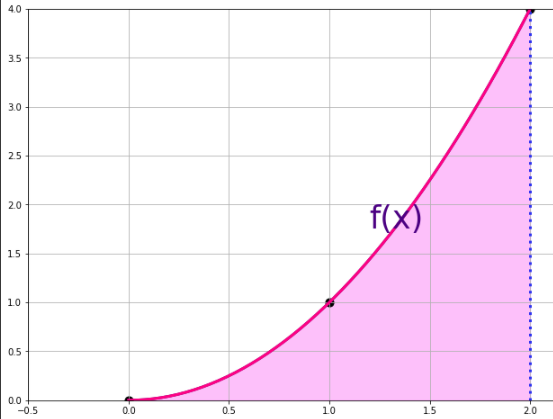



In [ ]:
simpson13(0,2,f1)

2.66666666666667

In [ ]:
#error
abs(simpson13(0,2,f1) - f1_real )

0

f2 Simpson

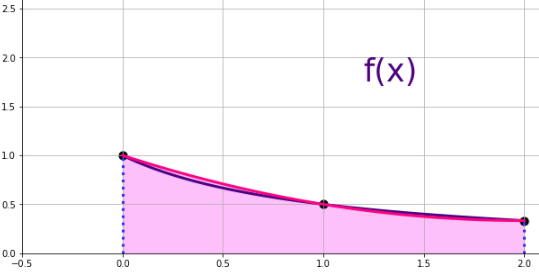

In [ ]:
simpson13(0,2,f2)

1.11111111111111

In [ ]:
#error
abs(simpson13(0,2,f2) - f2_real )

0.0124988224430014

f3 Simpson tira error el gráfico


In [ ]:
simpson13(0,1,f3).evalf()

1.71886115187659

In [ ]:
#error
abs(simpson13(0,1,f3).evalf() - f3_real )

0.000579323417547517

f4 Simpson

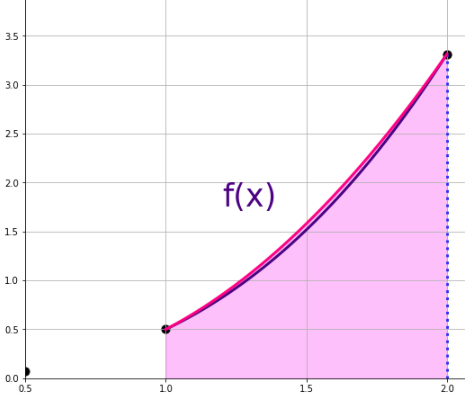

In [ ]:
simpson13(1,2,f4)

1.64697000442628

In [ ]:
#error
abs(simpson13(1,2,f4) - f4_real )

0.000129995573722397

#Simpson 3/8



In [ ]:
#def func(x): return x**2    #f1 0 a 2
#def func(x): return 1/(x+1)  #f2 0 a 2
#def func(x): return exp(x)  #f3 0 a 1 # ACA ME TIRA UN ERROR ?)
def func(x): return (x**3) /(1+x**0.5)  #f4 1 a 2

#limites
a =1
b =2

x = np.linspace(a,b,50) 
y = func(x)


seccion_interes = [a,b]

simpson38_x = np.linspace(seccion_interes[0],seccion_interes[1],4) # le paso 4 puntos ahora
simpson38_y = func(simpson38_x)
p_38 = lagrange(simpson38_x,simpson38_y)


def curva_simpson38(x): 
  return (p_38[3]*x**3+p_38[2]*x**2+p_38[1]*x+p_38[0])
  
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

seccion_interes = [a,b]
ax.vlines(x=seccion_interes[0], ymin=0, ymax=func(seccion_interes[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=seccion_interes[1], ymin=0, ymax=func(seccion_interes[1]) ,linewidth=3,linestyle=':',color='#2b30f1')


ax.text(1.2, 1.76, r'f(x)', fontsize=35,color='#4b0082')

ax.plot(x,curva_simpson38(x),color='#ff0082', linewidth=3)


ax.fill_between(x,curva_simpson38(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='#fb30f1', alpha=0.3)



ax.text(5.85, 1.6, "Simpson 3/8", size=30, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
## Fin Trapecio ---------------       

ax.scatter(simpson38_x, simpson38_y, s=84, marker='o', c='black')


ax.axis([-1, 3, 0 , 5])
ax.grid(True)

plt.show()

In [ ]:
x = sy.Symbol('x')
def simpson38(a,b,f):
 
    h = (b-a)/3
    x1 = h
    x2 = h*2
    
    return ((3/8) * h * (f.subs(x,a) + 3*f.subs(x,x1) + 3*f.subs(x,x2) + f.subs(x,b)))

f1 Simpson 38

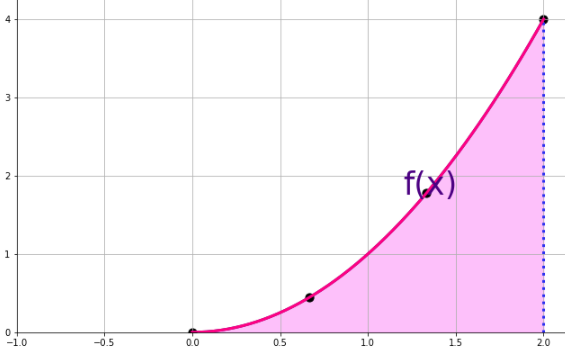

In [ ]:
simpson38(0,2,f1)

2.66666666666667

In [ ]:
#error
abs(simpson38(0,2,f1) - f1_real )

0

f2 Simpson 38

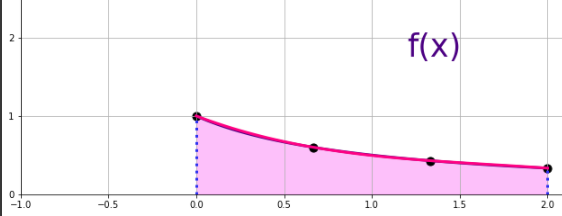

In [ ]:
simpson38(0,1,f3).evalf()

1.71854015336017

In [ ]:
#error
abs(simpson38(0,1,f3).evalf() - f3_real )

0.000258324901122320

f3 Simpson gráfico --> tiraba error


f4 Simpson 38

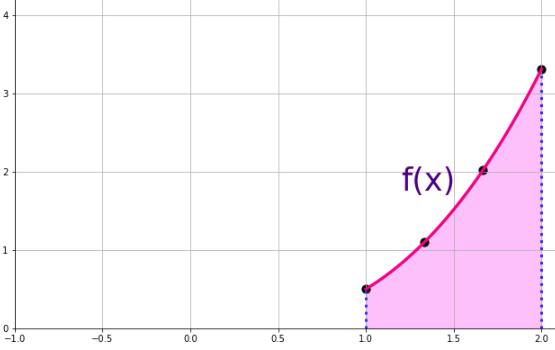

In [ ]:
simpson38(1,2,f4)

0.546686571455736

In [ ]:
#error
abs(simpson38(1,2,f4) - f4_real )

1.10041342854426